# Analysis of the relation (linear regression) between the sensation level difference (SL BC - SL AC) and the BC thresholds in the situation with signal at BCD-side

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress as linregress

In [2]:
# read difference sensation levels BC - AC simulated with a 65 dB ISDS input signal at BCD side (90 degree angle)
def read_diff_sl():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/Diff_SL_65dB_S_BCDside.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', drop=True, inplace=True, verify_integrity=True)
    return df

In [3]:
def select_dsl():
    dsl = read_diff_sl()
    dsl1 = dsl[['f_500_Hz', 'f_1000_Hz', 
              'f_2000_Hz', 'f_4000_Hz']].copy()
    return dsl1

In [4]:
def read_AC_thresholds():
    # read measured thresholds
    f_in = '//media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/AC_measured_thresholds.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [5]:
def read_BC_direct():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/BCdirect.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df = df.drop(['Unnamed: 0'], axis=1)
    df.set_index('Study_ID', inplace=True)
    return df

In [6]:
def present_BC_direct():
    bc = read_BC_direct()
    bc1 = bc[['BCdimp_500', 'BCdimp_1000', 
              'BCdimp_2000', 'BCdimp_2000']].copy()
    return bc1

In [7]:
bct = present_BC_direct()
dsl = select_dsl()

In [8]:
dsl

,f_500_Hz,f_1000_Hz,f_2000_Hz,f_4000_Hz
Study_ID,,,,
34,-39.5,2.0,2.2,22.0
35,-24.6,-0.3,-7.4,27.5
43,-18.4,1.3,-11.6,-5.5
47,-30.5,-1.0,11.5,7.0
50,-38.7,-5.2,-0.2,-0.7
53,-20.7,2.3,0.6,-3.6
54,-19.8,-6.7,5.1,12.7
56,-29.4,-9.9,10.4,19.3
59,-30.3,-7.5,1.3,2.6


In [9]:
bct

,BCdimp_500,BCdimp_1000,BCdimp_2000,BCdimp_2000
Study_ID,,,,
34,20,-5,15,15
35,20,15,35,35
43,15,10,20,20
47,15,10,5,5
50,20,5,5,5
53,25,10,10,10
54,20,20,15,15
56,30,30,25,25
59,25,25,5,5


In [10]:
for i in range(4):
    bc = (bct.iloc[:,i]).to_numpy(dtype='float')
    ds = (dsl.iloc[:,i]).to_numpy(dtype='float')
    lrgrs = linregress(bc, ds)
    f = int(2**(i)*500)
    print(f,'Hz', lrgrs)

500 Hz LinregressResult(slope=-0.44021276595744685, intercept=-20.190425531914894, rvalue=-0.36764708503374816, pvalue=0.11077084906837135, stderr=0.2624593432562433, intercept_stderr=5.854079019290142)
1000 Hz LinregressResult(slope=-0.5832188420019627, intercept=3.3690873405299318, rvalue=-0.6525333325810396, pvalue=0.001817482202263171, stderr=0.1596335902014682, intercept_stderr=2.747599702373109)
2000 Hz LinregressResult(slope=-0.4202854424357755, intercept=9.879067554709799, rvalue=-0.4428132601191434, pvalue=0.05055106518521977, stderr=0.2005824474745234, intercept_stderr=3.2882676709205554)
4000 Hz LinregressResult(slope=0.6708087535680305, intercept=-2.074024738344434, rvalue=0.5526883627456186, pvalue=0.011495444551926828, stderr=0.23841270533532066, intercept_stderr=3.908441646622232)


In [11]:
bc_1k = bct.iloc[:,1].to_numpy(dtype='float')
dsl_1k = (dsl.iloc[:,1]).to_numpy(dtype='float')
lrgrs_1k = linregress(bc_1k, dsl_1k)
r2_1k = (lrgrs_1k[2])**2
r2_1k = round(r2_1k, 2)
s_1k = 'r square 1 kHz = ' + str(r2_1k)
print(s_1k)

r square 1 kHz = 0.43


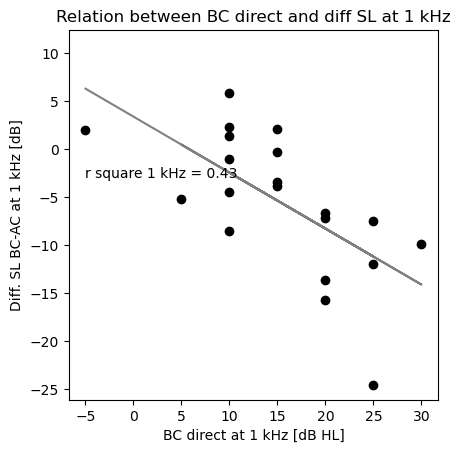

In [12]:
plt.scatter(bc_1k, dsl_1k, c='black')
plt.title("Relation between BC direct and diff SL at 1 kHz")
plt.xlabel("BC direct at 1 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 1 kHz [dB]")
plt.axis('square')
slope = lrgrs_1k[0]
intercept = lrgrs_1k[1]
plt.plot(bc_1k, slope*bc_1k + intercept, color='grey')
plt.text(-5, -3, s_1k)
plt.show()

In [13]:
bc_2k = bct.iloc[:,2].to_numpy(dtype='float')
dsl_2k = (dsl.iloc[:,2]).to_numpy(dtype='float')
lrgrs_2k = linregress(bc_2k, dsl_2k)
r2_2k= (lrgrs_2k[2])**2
r2_2k = round(r2_2k, 2)
s_2k = 'r square 2 kHz = ' + str(r2_2k)
print(s_2k)

r square 2 kHz = 0.2


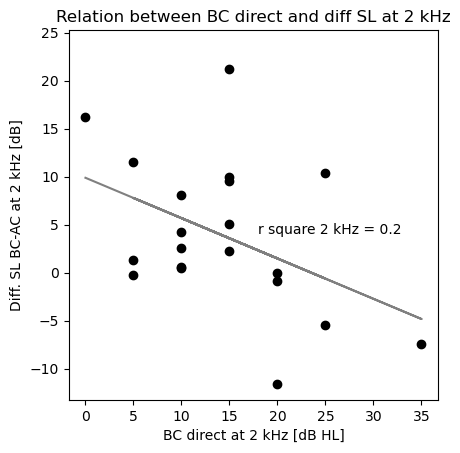

In [14]:
plt.scatter(bc_2k, dsl_2k, c='black')
plt.title("Relation between BC direct and diff SL at 2 kHz")
plt.xlabel("BC direct at 2 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 2 kHz [dB]")
plt.axis('square')
slope = lrgrs_2k[0]
intercept = lrgrs_2k[1]
plt.plot(bc_2k, slope*bc_2k + intercept, color='grey')
plt.text(18, 4, s_2k)
plt.show()

In [15]:
bc_4k = bct.iloc[:,3].to_numpy(dtype='float')
dsl_4k = (dsl.iloc[:,3]).to_numpy(dtype='float')
lrgrs_4k = linregress(bc_4k, dsl_4k)
r2_4k= (lrgrs_4k[2])**2
r2_4k = round(r2_4k, 2)
s_4k = 'r square 4 kHz = ' + str(r2_4k)
print(s_4k)

r square 4 kHz = 0.31


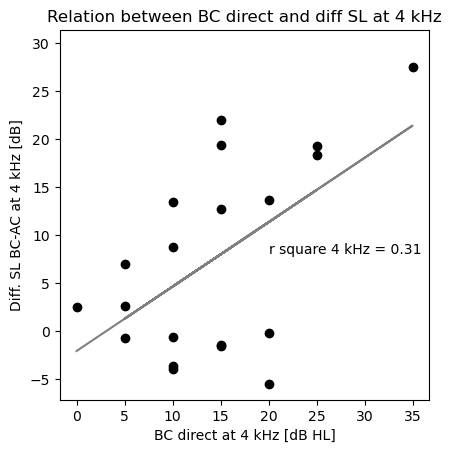

In [16]:
plt.scatter(bc_4k, dsl_4k, c='black')
plt.title("Relation between BC direct and diff SL at 4 kHz")
plt.xlabel("BC direct at 4 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 4 kHz [dB]")
plt.axis('square')
slope = lrgrs_4k[0]
intercept = lrgrs_4k[1]
plt.plot(bc_4k, slope*bc_4k + intercept, color='grey')
plt.text(20, 8, s_4k)
plt.show()